In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ramjidoolla/ipl-data-set")

print("Path to dataset files:", path)


100%|██████████| 1.24M/1.24M [00:00<00:00, 1.71MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ramjidoolla/ipl-data-set/versions/1


In [6]:
import os

base_path = "/root/.kagglehub/datasets/ramjidoolla/ipl-data-set"

# Show all folders and files inside that dataset
for root, dirs, files in os.walk(base_path):
    print("📁 Folder:", root)
    for file in files:
        print("   📄 File:", file)



In [8]:
import pandas as pd

df = pd.read_csv("/root/.cache/kagglehub/datasets/ramjidoolla/ipl-data-set/versions/1/matches.csv")

display(df.head())

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [11]:
# Using this we will not about no. of rows and columns
df.shape


(756, 18)

In [12]:
# By this we will know about columns
df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [13]:
# Checks for missing value
df.isnull().sum()

,0
id,0
Season,0
city,7
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
dl_applied,0


In [14]:
df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [17]:
# So using this we will remove any space we have in columns
df.columns = df.columns.str.strip()
print(df.columns)

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')


 Q1: Which team has won the most matches?


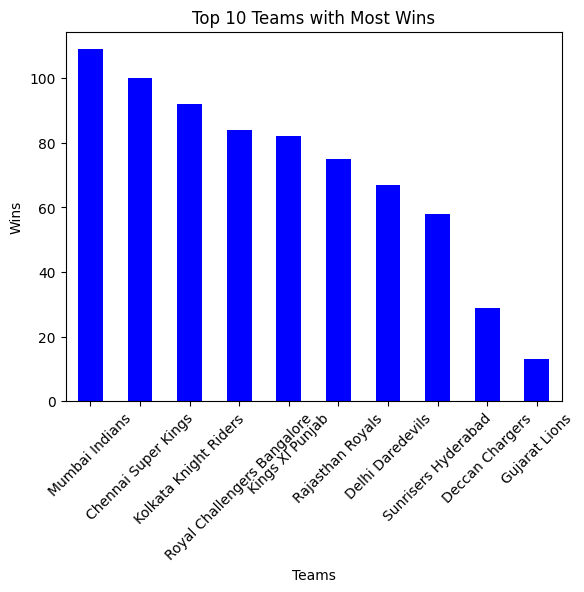

In [19]:
import matplotlib.pyplot as plt

top_teams = df['winner'].value_counts().head(10)
top_teams.plot(kind = 'bar',color= 'blue')
plt.title('Top 10 Teams with Most Wins')
plt.ylabel('Wins')
plt.xlabel('Teams')
plt.xticks(rotation=45)
plt.show()

 2. Which player has won the most "Player of the Match" awards?

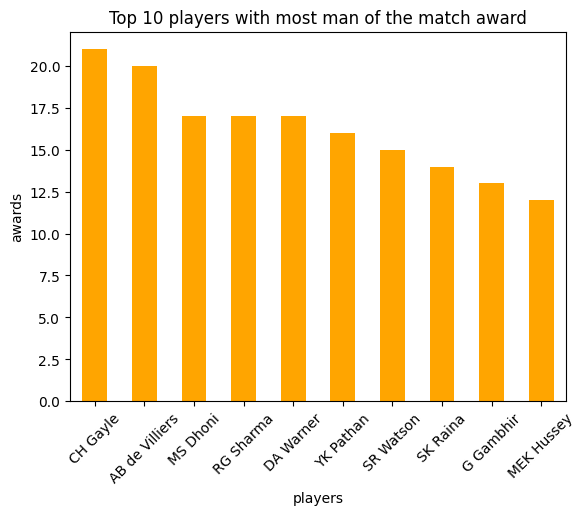

In [21]:
top_players = df['player_of_match'].value_counts().head(10)
top_players.plot(kind = 'bar', color = 'orange')
plt.title('Top 10 players with most man of the match award')
plt.ylabel('awards')
plt.xlabel('players')
plt.xticks(rotation = 45)
plt.show()

3. How many matches played each season?

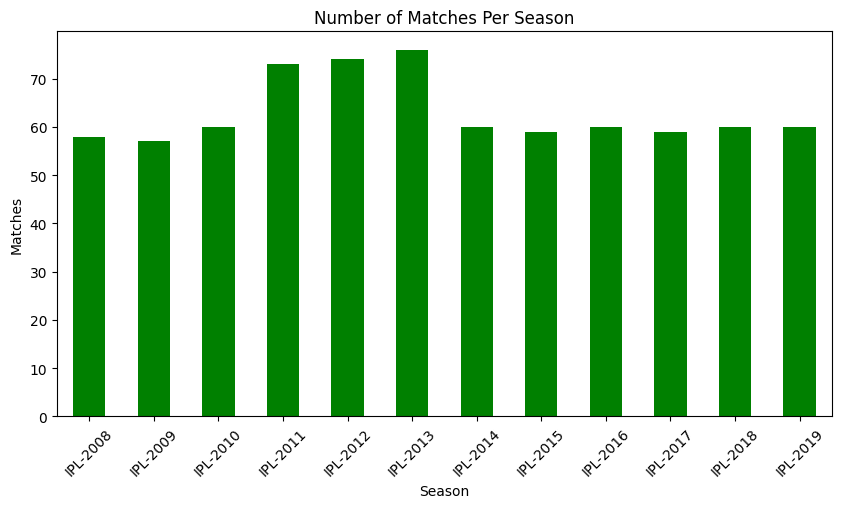

In [24]:
season_match = df['Season'].value_counts().sort_index()

plt.figure(figsize=(10,5))
season_match.plot(kind='bar', color='green')
plt.title('Number of Matches Per Season')
plt.ylabel('Matches')
plt.xlabel('Season')
plt.xticks(rotation=45)
plt.show()


 4. Does toss winner usually win the match?

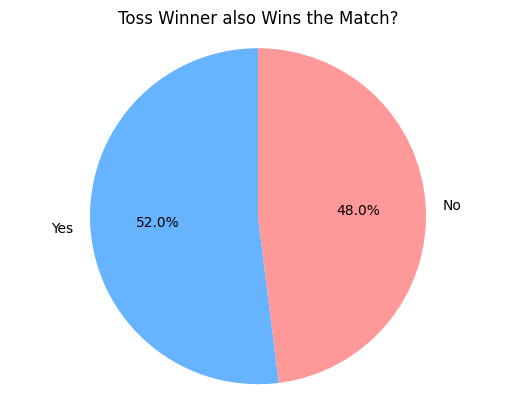

In [25]:
df['toss_match_same'] = df['toss_winner'] == df['winner']

toss_result = df['toss_match_same'].value_counts(normalize=True) * 100

plt.pie(toss_result, labels=['Yes', 'No'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Toss Winner also Wins the Match?')
plt.axis('equal')
plt.show()
